In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('D:\data analysis\python\pr\zomato.csv')


In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape


(51717, 17)

#### Observation:
#### Their are 51717 rows and 17 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### Observation:
#### It seems their are some missing values in some of the columns lets check more

## Total nulls 


In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Observation:
#### Most of the nulls are present in the dishliked columns and then in the rate column. 
#### Lets see these nulls in percentage values

### Nulls in percentage

In [7]:
df.isna().mean().round(4)*100

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

#### Some columns are irrelevent for our analysis like url,phone and listed_in (city) so lets drop those columns.



In [8]:
df.drop(['address','url','phone','listed_in(city)','menu_item'],axis=1,inplace=True)

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


### Let's rename some of the column name for better understanding


In [10]:
df.rename({'approx_cost(for two people)': 'approx_cost_for_two','rest_type':'restaurant_type','listed_in(type)':'type_of_meal'}, axis=1,inplace=True)

In [11]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'restaurant_type', 'dish_liked', 'cuisines', 'approx_cost_for_two',
       'reviews_list', 'type_of_meal'],
      dtype='object')

#### Now lets see how many duplicate values are present in the data

In [12]:
# Checking duplicate values
df.duplicated().sum()

12747

In [13]:
# Original shape
df.shape

(51717, 12)

##### Observations:
##### It seems like out of 51717 rows 12747 are duplicate data

#### Let's create  a new data frame name updated_df where duplicate data are dropped

In [14]:
updated_df=df.drop_duplicates()

In [15]:
updated_df.shape

(38970, 12)

##### So now we have 38970 data after dropping duplicates

In [16]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38970 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 38970 non-null  object
 1   online_order         38970 non-null  object
 2   book_table           38970 non-null  object
 3   rate                 35120 non-null  object
 4   votes                38970 non-null  int64 
 5   location             38956 non-null  object
 6   restaurant_type      38808 non-null  object
 7   dish_liked           20594 non-null  object
 8   cuisines             38937 non-null  object
 9   approx_cost_for_two  38717 non-null  object
 10  reviews_list         38970 non-null  object
 11  type_of_meal         38970 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.9+ MB


#### Total Nulls

In [17]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                    3850
votes                      0
location                  14
restaurant_type          162
dish_liked             18376
cuisines                  33
approx_cost_for_two      253
reviews_list               0
type_of_meal               0
dtype: int64

## Let's investigate the rate  column

In [18]:
updated_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

##### Observation:
##### 1. It seems like the data is in string format, we need to convert them to decimals by removing
##### 2. We also need to remove string values like "NEW" and "-".

## Checking total '-' in columns

In [19]:

dash_rate=updated_df['rate']=='-'
dash_rate.sum()

69

## Checking total 'NEW'  in columns

In [20]:
new_rate=updated_df['rate']=='NEW'
new_rate.sum()

1429

In [21]:
updated_df['rate'].isna().sum()

3850

#### Observation:
#### Their are 69 '-' values, 1429 'NEW' values and 3850 null values

## Removing "-", "/", "NEW" from the rate column and converting to float

In [22]:
def rates(value):
    if (value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
updated_df['rate']=updated_df['rate'].apply(rates)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_46324/2590154922.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['rate']=updated_df['rate'].apply(rates)


In [23]:
updated_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [24]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                    5348
votes                      0
location                  14
restaurant_type          162
dish_liked             18376
cuisines                  33
approx_cost_for_two      253
reviews_list               0
type_of_meal               0
dtype: int64

#### Observartion:
#### Since we replace the 'NEW' and'-' with nulls, the overall null value of rate has increased from 4261 to 5930

In [74]:
updated_df.describe()

,rate,votes,approx_cost_for_two
count,38557.000000,38557.000000,38557.000000
mean,3.733520,357.170345,593.795083
std,0.418918,912.865256,458.911309
min,1.800000,0.000000,40.000000
25%,3.500000,12.000000,300.000000
50%,3.731860,62.000000,450.000000
75%,4.000000,274.000000,700.000000
max,4.900000,16832.000000,6000.000000


### Plotting the distrubution of rate column

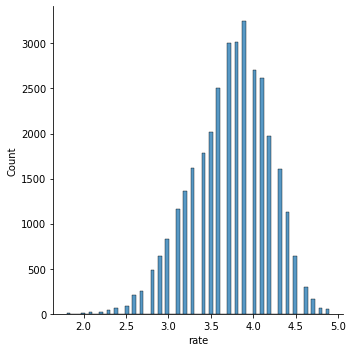

In [26]:
sns.displot(x=updated_df.rate)
plt.show()

## using mean to fill up null values

In [27]:
updated_df['rate'].fillna(updated_df['rate'].mean(),inplace=True)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_46324/3480411070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['rate'].fillna(updated_df['rate'].mean(),inplace=True)


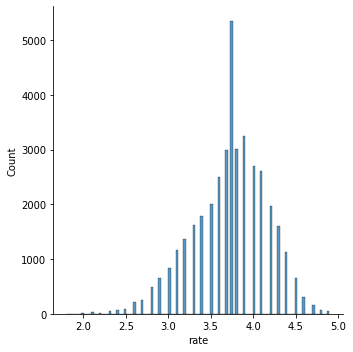

In [28]:
sns.displot(x=updated_df.rate)
plt.show()

In [29]:
updated_df['rate'].isnull().sum()

0

In [30]:
updated_df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.73186009, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [31]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                       0
votes                      0
location                  14
restaurant_type          162
dish_liked             18376
cuisines                  33
approx_cost_for_two      253
reviews_list               0
type_of_meal               0
dtype: int64

###  Droping  null values from location,cost_for_two,restaurant_type and cuisines

In [32]:

updated_df.dropna(subset=['location','cuisines', 'approx_cost_for_two', 'restaurant_type'],inplace=True)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_46324/2632129895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df.dropna(subset=['location','cuisines', 'approx_cost_for_two', 'restaurant_type'],inplace=True)


In [33]:
updated_df.isna().sum()

name                       0
online_order               0
book_table                 0
rate                       0
votes                      0
location                   0
restaurant_type            0
dish_liked             18136
cuisines                   0
approx_cost_for_two        0
reviews_list               0
type_of_meal               0
dtype: int64

In [34]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


### The approx_cost_for_two column is in object format so we need to change it to integer

In [35]:
updated_df['approx_cost_for_two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## Converting to integer by removing commas

In [36]:
def comma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)
updated_df['approx_cost_for_two'] = updated_df['approx_cost_for_two'].apply(comma)
updated_df['approx_cost_for_two'].unique()




C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_46324/3457196647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['approx_cost_for_two'] = updated_df['approx_cost_for_two'].apply(comma)


array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [37]:
updated_df['approx_cost_for_two'].describe()

count    38557.000000
mean       593.795083
std        458.911309
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost_for_two, dtype: float64

In [38]:
updated_df.isna().mean().round(4)*100

name                    0.00
online_order            0.00
book_table              0.00
rate                    0.00
votes                   0.00
location                0.00
restaurant_type         0.00
dish_liked             47.04
cuisines                0.00
approx_cost_for_two     0.00
reviews_list            0.00
type_of_meal            0.00
dtype: float64

## Replacing null values with 'Not Avialable' in dish_liked column'

In [39]:
updated_df['dish_liked'].fillna('Not Available',inplace=True)


C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_46324/971125774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['dish_liked'].fillna('Not Available',inplace=True)


In [40]:
updated_df.isna().sum()

name                   0
online_order           0
book_table             0
rate                   0
votes                  0
location               0
restaurant_type        0
dish_liked             0
cuisines               0
approx_cost_for_two    0
reviews_list           0
type_of_meal           0
dtype: int64

In [41]:
updated_df['reviews_list'].iloc[1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

## Let's Cleaning the review column

In [75]:
import re

### Removing unnecessary characters

In [106]:
updated_df['reviews_list']=updated_df['reviews_list'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x)).replace({'\d+':'', 'Rated':'', 'RATEDn':''},regex=True)  ## to remove uinnecessary characters

C:\Users\SAMRAT~1\AppData\Local\Temp/ipykernel_46324/2396015627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df['reviews_list']=updated_df['reviews_list'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x)).replace({'\d+':'', 'Rated':'', 'RATEDn':''},regex=True)  ## to remove uinnecessary characters


In [107]:
updated_df['reviews_list'].iloc[1]

'    Had been here for dinner with family Turned out to be a good choose suitable for all ages of people Can try this place We liked the most was their starters Service is good Prices are affordable Will recommend this restaurant for early dinner The place is little noisy     The ambience is really nice staff is courteous The price is pretty high for the quantity but overall the experience was fine The quality of food is nice but nothing extraordinary They also have buffetonly veg     I felt good is little expensive for the quantity they serve and In terms of taste is decent There is nothing much to talk about the ambience regular casual dining restaurant where you can take your family for dinner or lunch If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers     I was looking for a quite place to spend some time with family and as well wanted to try some new place Since I was at Bana

In [45]:
# updated_df.to_csv(r'D:\data analysis\zomato_copy.csv', index=False)


In [41]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


## Visulalising the data

#### Top 10 most voted restaurant

In [93]:
most_voted_restaurant=updated_df.groupby(['name'])['votes'].sum().sort_values(ascending=False)[:10]

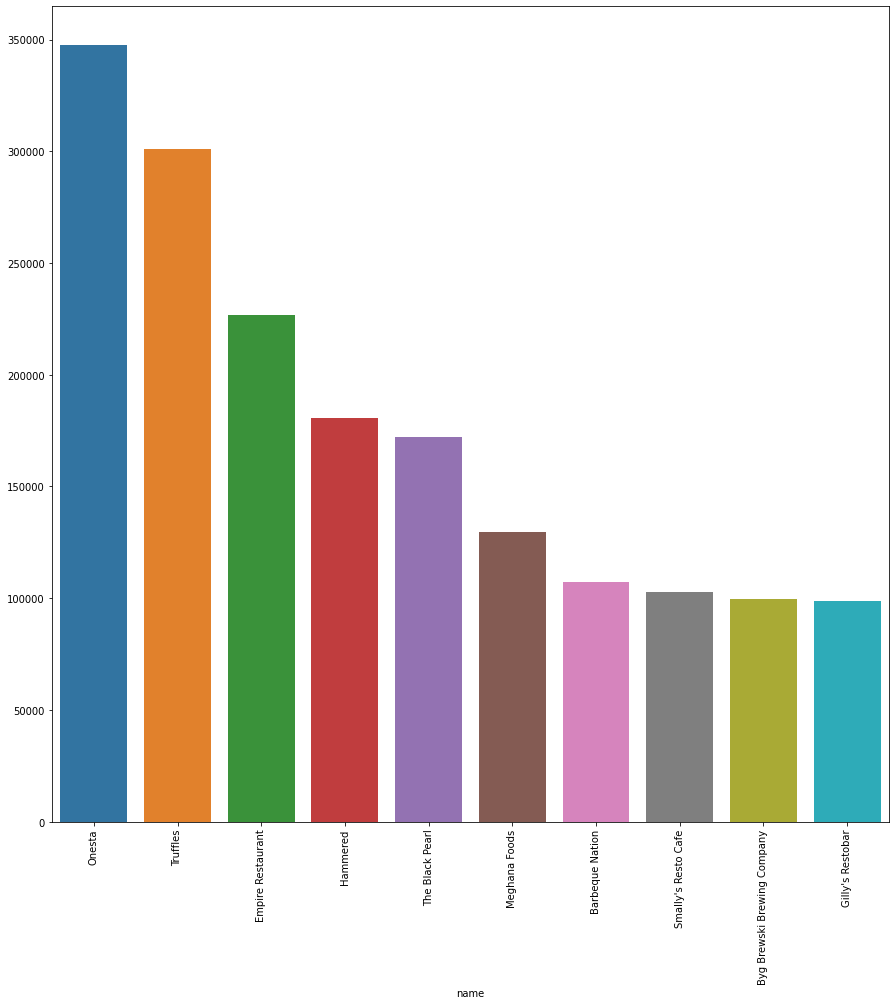

In [94]:

plt.figure(figsize=(15,15))
sns.barplot(x=most_voted_restaurant.index, y=most_voted_restaurant.values)
plt.xticks(rotation=90)
plt.show()


### Locations  with the most amount of restaurant

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

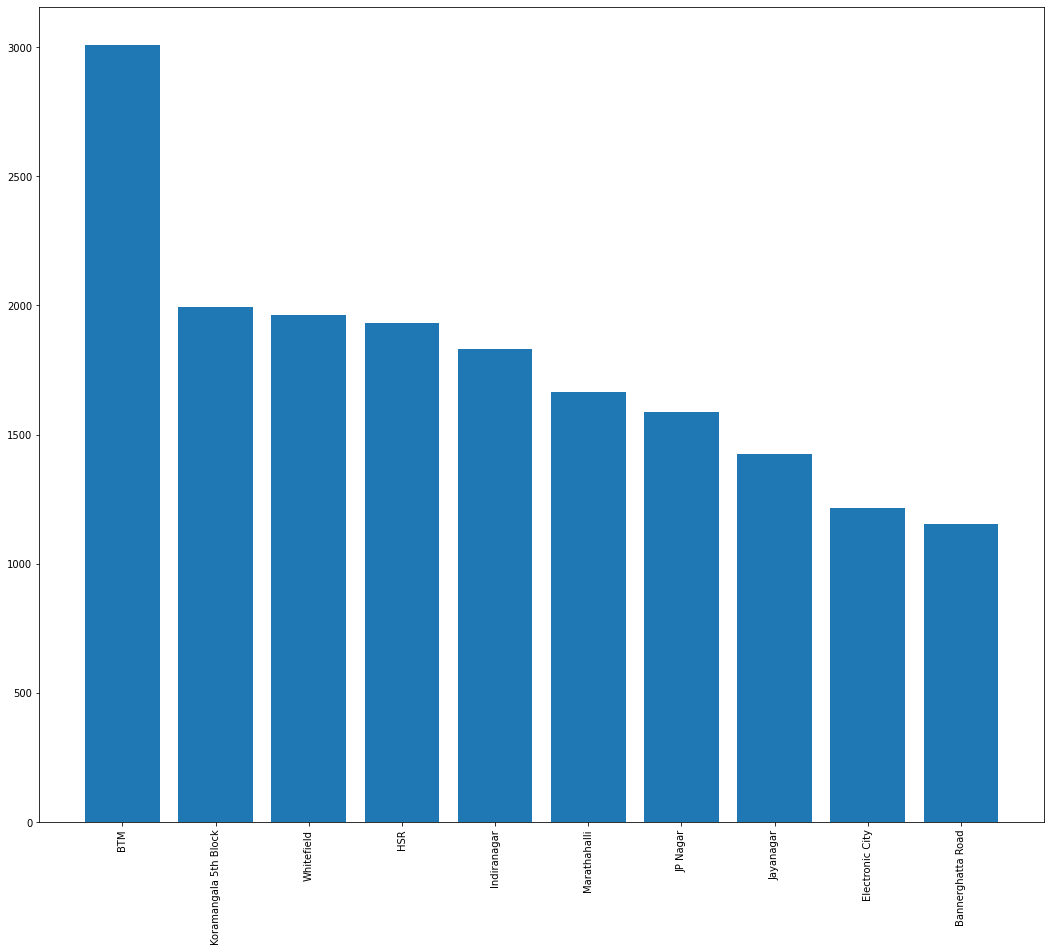

In [104]:
most_located_restaurant=updated_df.groupby(['location'])['name'].count().sort_values(ascending=False)[:10]
most_located_restaurant
plt.figure(figsize=(18,15))

plt.bar(most_located_restaurant.index,most_located_restaurant.values)
plt.xticks(rotation=90)



## Most voted restaurant type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

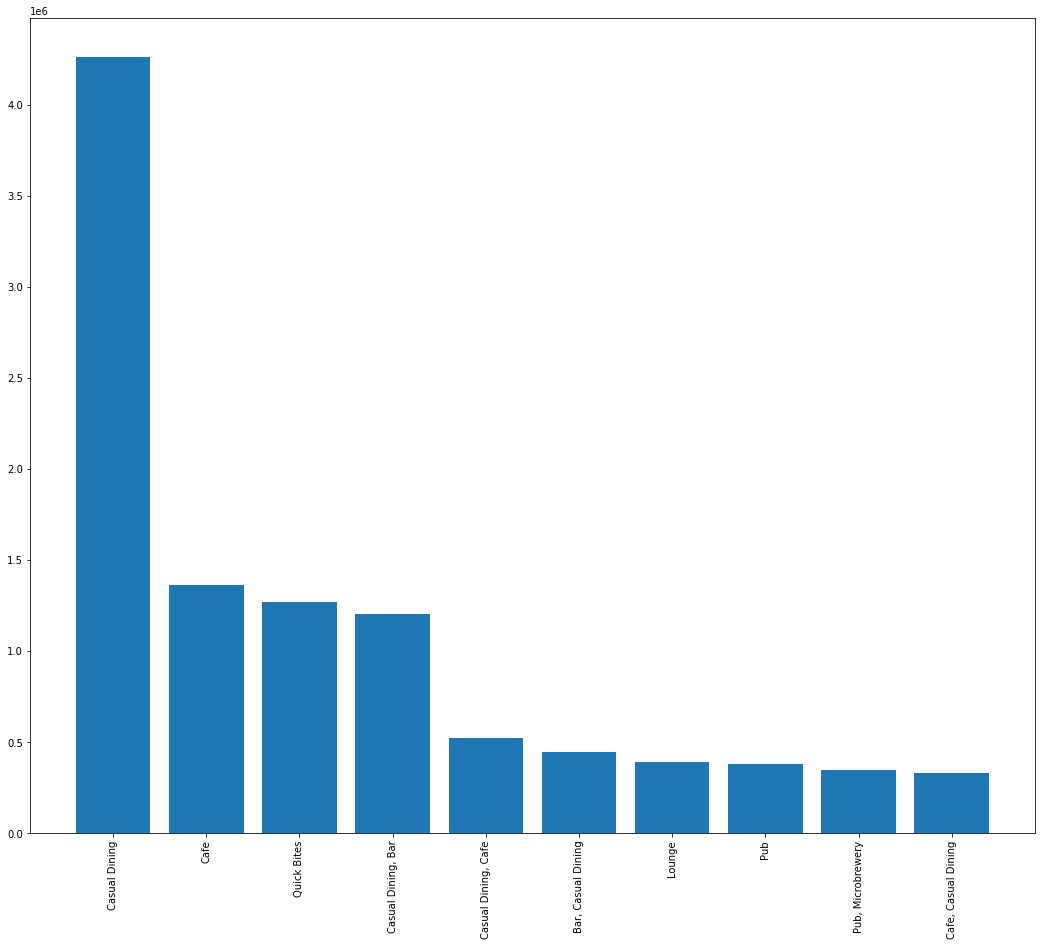

In [103]:
most_voted_restaurant_type=updated_df.groupby(['restaurant_type'])['votes'].sum().sort_values(ascending=False)[:10]
most_voted_restaurant_type
plt.figure(figsize=(18,15))

plt.bar(most_voted_restaurant_type.index,most_voted_restaurant_type.values)
plt.xticks(rotation=90)

### Voted type of meal

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

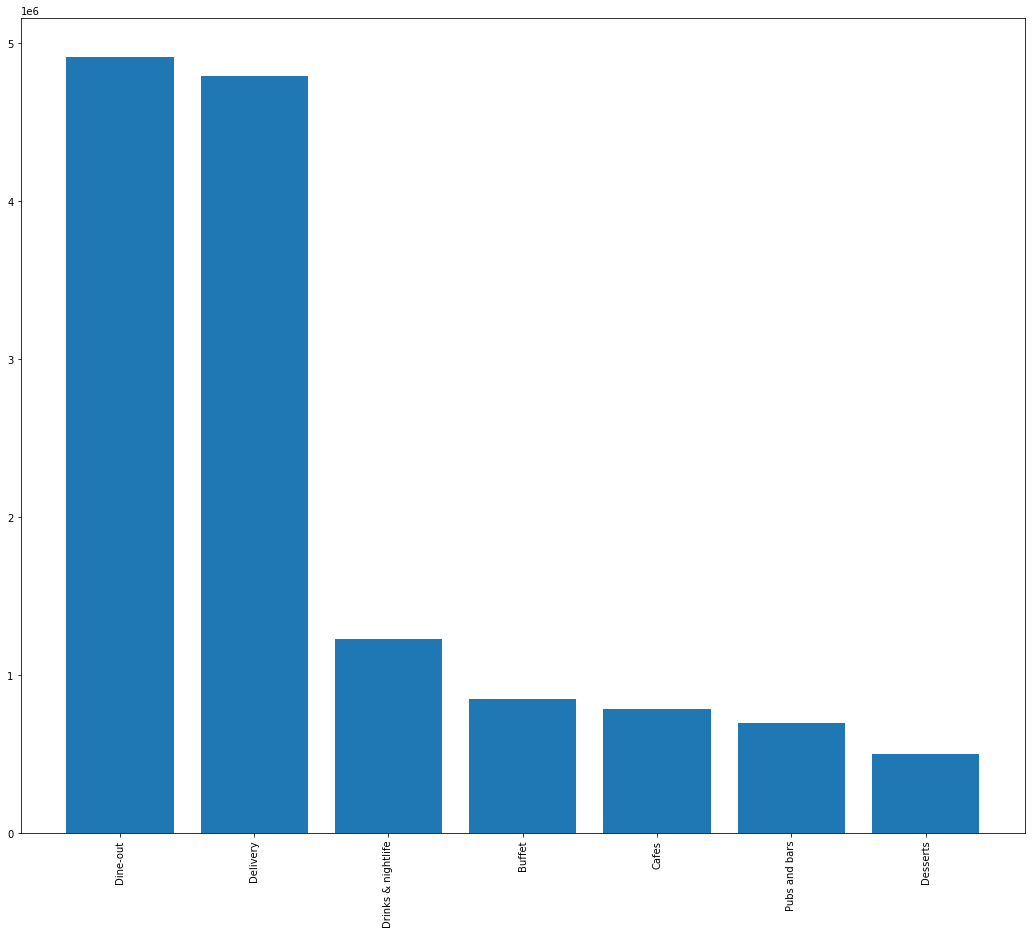

In [105]:
most_voted_type_of_meal=updated_df.groupby(['type_of_meal'])['votes'].sum().sort_values(ascending=False)[:10]
most_voted_type_of_meal
plt.figure(figsize=(18,15))

plt.bar(most_voted_type_of_meal.index,most_voted_type_of_meal.values)
plt.xticks(rotation=90)

In [97]:
updated_df['restaurant_type'].value_counts()

Quick Bites                   13327
Casual Dining                  8510
Cafe                           2944
Delivery                       1733
Dessert Parlor                 1672
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: restaurant_type, Length: 93, dtype: int64

<BarContainer object of 93 artists>

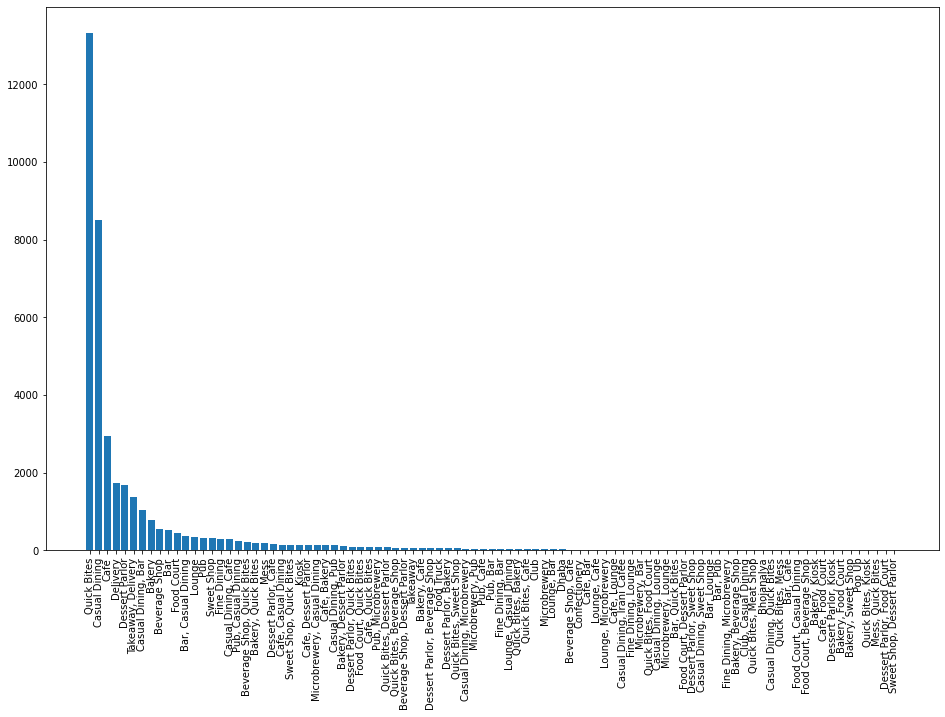

In [74]:
types_of_restaurants=updated_df['restaurant_type'].value_counts()
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
plt.bar(types_of_restaurants.index,types_of_restaurants.values)


c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type of Service')

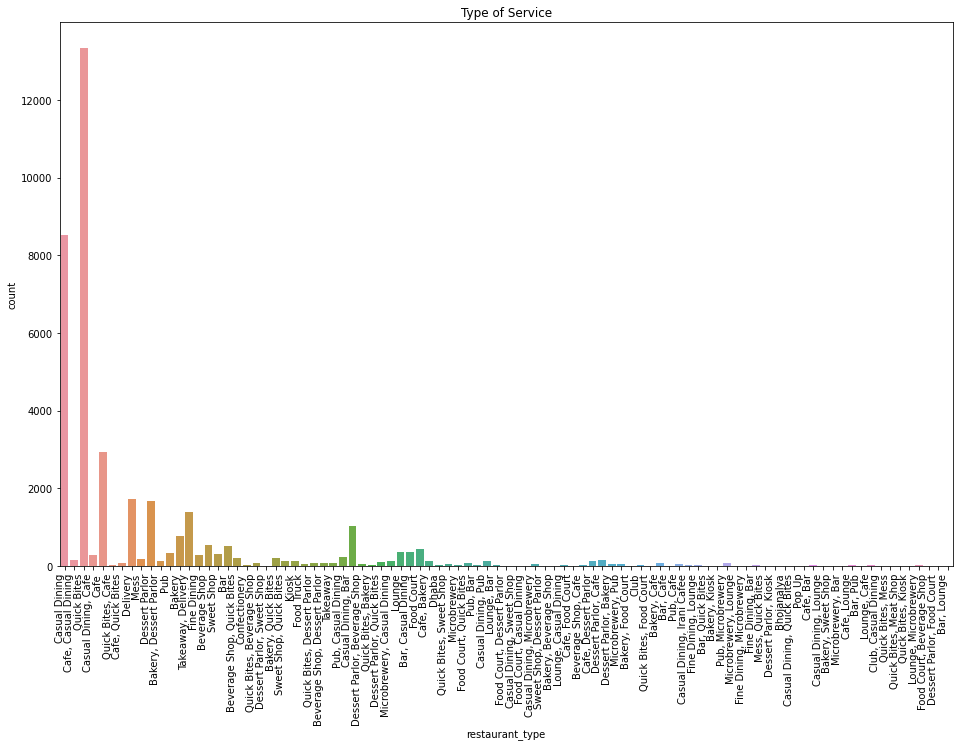

In [77]:
sns.countplot(updated_df['restaurant_type'])
sns.countplot(updated_df['restaurant_type']).set_xticklabels(sns.countplot(updated_df['restaurant_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title('Type of Service')

In [53]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


In [55]:
# grouped_rate_order=updated_df.groupby(['approx_cost_for_two','book_table'])['rate'].count().reset_index()[:50]
# grouped_rate_order=pd.pivot_table(grouped_rate_order,values=None,index=['approx_cost_for_two'],columns=['book_table'],fill_value=0,aggfunc=np.sum)

# grouped_rate_order.head()

# px = grouped_rate_order.plot(kind='bar', stacked=False,figsize=(10,6))
# plt.show()

###  Online Vs offline Order

<AxesSubplot:xlabel='online_order', ylabel='count'>

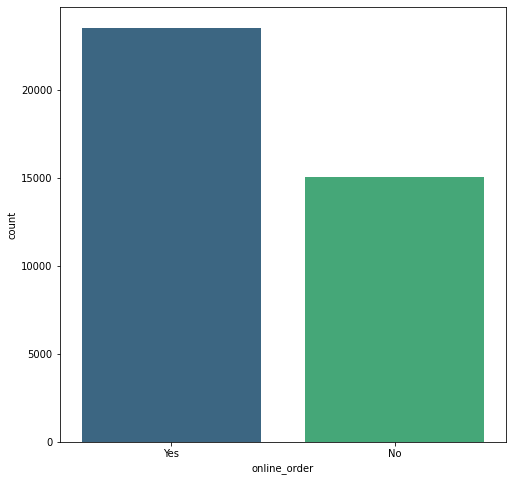

In [76]:
plt.figure(figsize=(8,8))

sns.countplot(x='online_order', data=updated_df, palette='viridis')

#### Booking table

<AxesSubplot:xlabel='book_table', ylabel='count'>

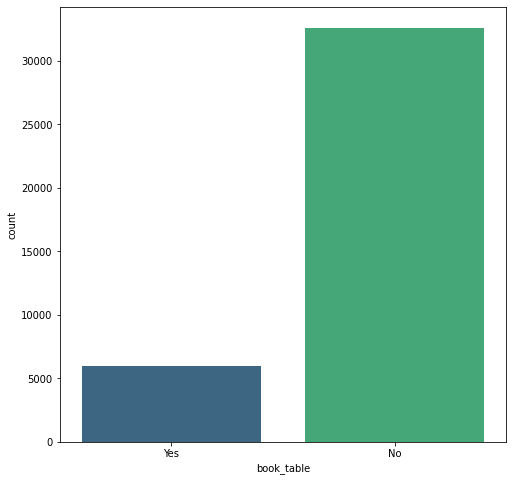

In [77]:
plt.figure(figsize=(8,8))

sns.countplot(x='book_table', data=updated_df, palette='viridis')

In [63]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


In [65]:
updated_df['name'].value_counts()

Cafe Coffee Day                                            90
Onesta                                                     85
Empire Restaurant                                          69
Just Bake                                                  66
Kanti Sweets                                               63
                                                           ..
late100                                                     1
Sree Ganesh Fruit Juice Center                              1
Opt For Fitness                                             1
Hot Momos                                                   1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64

In [95]:
grouped_online_order=updated_df.groupby(['location','online_order'])['name'].count().reset_index()[:50]
grouped_online_order=pd.pivot_table(grouped_online_order,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)

grouped_online_order.head()

name      
online_order        No   Yes
location                    
BTM                924  2082
Banashankari       276   359
Banaswadi          216   255
Bannerghatta Road  419   735
Basavanagudi       193   301

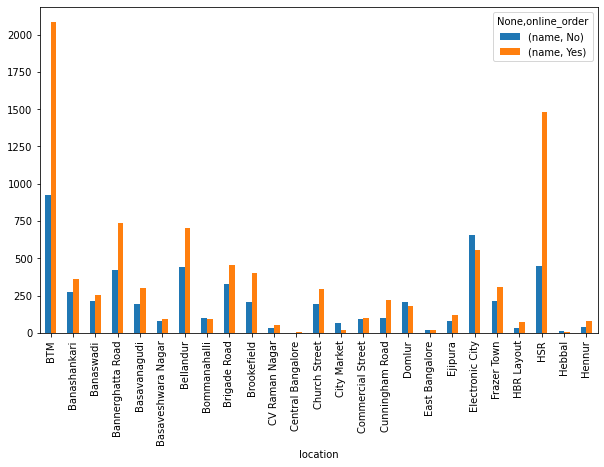

In [48]:

ax = grouped_online_order.plot(kind='bar', stacked=False,figsize=(10,6))
plt.show()

In [49]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


In [50]:
grouped_booking=updated_df.groupby(['location','book_table'])['name'].count().reset_index()[:50]
grouped_booking=pd.pivot_table(grouped_booking,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)

grouped_booking.head()

name     
book_table           No  Yes
location                    
BTM                2861  145
Banashankari        583   52
Banaswadi           465    6
Bannerghatta Road  1063   91
Basavanagudi        482   12

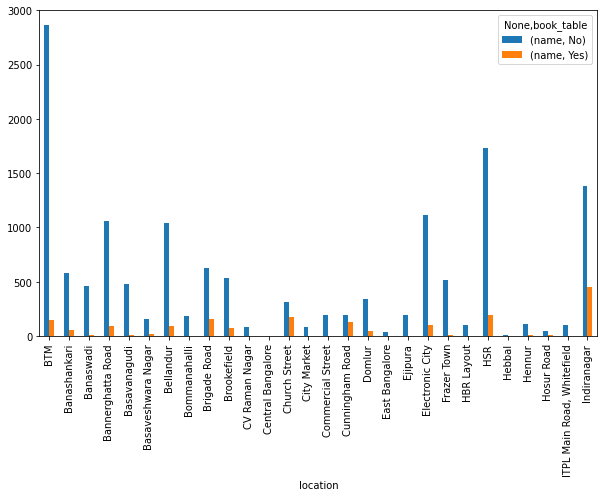

In [51]:

ax = grouped_booking.plot(kind='bar', stacked=False,figsize=(10,6))
plt.show()

In [52]:
liked_dish=updated_df['dish_liked'].value_counts()
liked_dish=liked_dish.drop('Not Available')

In [53]:
top_10_liked_dish=liked_dish[:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

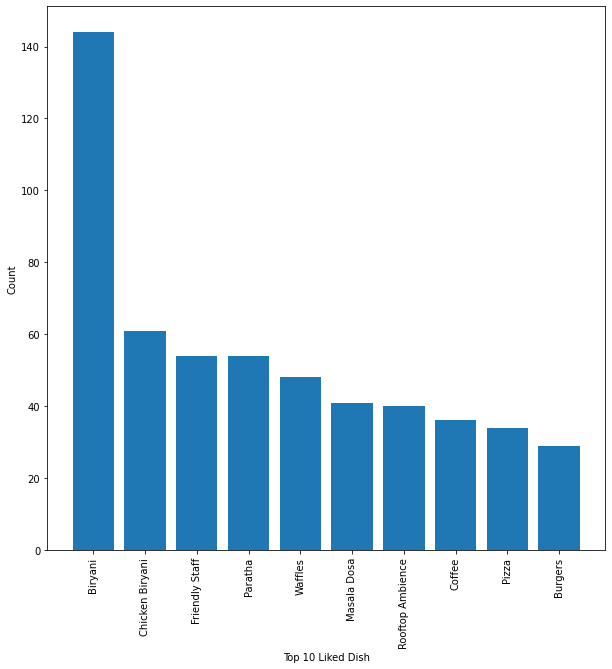

In [54]:
plt.figure(figsize=(10,10))

plt.bar(top_10_liked_dish.index,top_10_liked_dish.values)
plt.xlabel('Top 10 Liked Dish')
plt.ylabel('Count')
plt.xticks(rotation=90)


In [55]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38557 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 38557 non-null  object 
 1   online_order         38557 non-null  object 
 2   book_table           38557 non-null  object 
 3   rate                 38557 non-null  float64
 4   votes                38557 non-null  int64  
 5   location             38557 non-null  object 
 6   restaurant_type      38557 non-null  object 
 7   dish_liked           38557 non-null  object 
 8   cuisines             38557 non-null  object 
 9   approx_cost_for_two  38557 non-null  int64  
 10  reviews_list         38557 non-null  object 
 11  type_of_meal         38557 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.8+ MB


In [56]:
most_voted_cuisine = df[['cuisines', 'votes']]
most_voted_cuisine.sort_values('votes',ascending=False)

,cuisines,votes
49170,"Continental, North Indian, Italian, South Indi...",16832
50059,"Continental, North Indian, Italian, South Indi...",16832
49627,"Continental, North Indian, Italian, South Indi...",16832
3921,"Continental, North Indian, Italian, South Indi...",16345
4801,"Continental, North Indian, Italian, South Indi...",16345
...,...,...
8124,North Indian,0
8123,"Beverages, Fast Food",0
8122,South Indian,0
18450,"South Indian, North Indian, Chinese, Beverages",0


In [59]:
updated_df['dish_liked'].value_counts()

Not Available                                                                          18136
Biryani                                                                                  144
Chicken Biryani                                                                           61
Friendly Staff                                                                            54
Paratha                                                                                   54
                                                                                       ...  
Sandwiches, Salads, Gol Gappe, Panipuri, Pizza Sandwich, Cheesy Pizza, Lychee Juice        1
Tea, Coffee, Rasmalai, Raj Kachori, Masala Dosa, Vegetable Biryani, Vada Sambar            1
Cheese Burst Pizza                                                                         1
Biryani, Rolls, Tandoori Chicken, Chicken Egg Roll, Laccha Paratha                         1
Burgers, Chicken Burger, Chips, Veg Burger                            

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

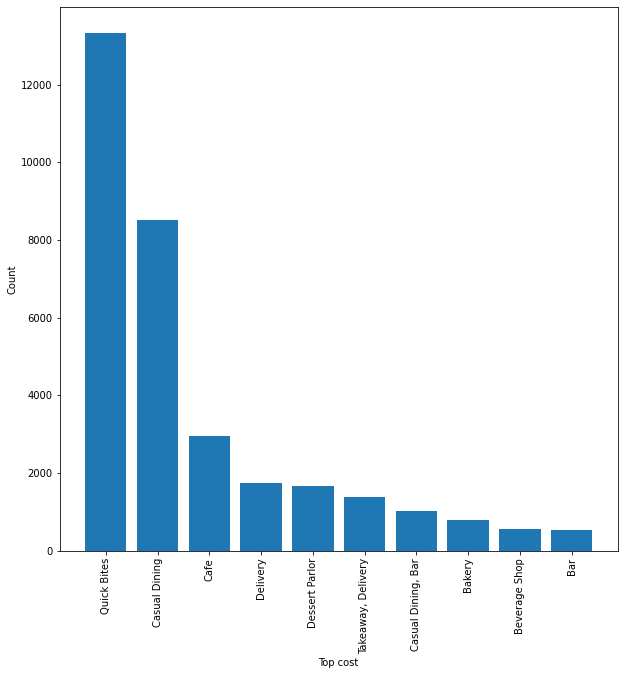

In [70]:

cost=updated_df['restaurant_type'].value_counts()[:10]
plt.figure(figsize=(10,10))

plt.bar(cost.index,cost.values)
plt.xlabel('Top cost')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [72]:

updated_df.head()

,name,online_order,book_table,rate,votes,location,restaurant_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Very good restaurant in neighbourhood Buff...,Buffet


### Top 10 restraunt chains

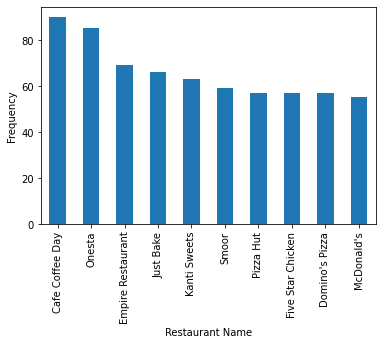

In [73]:
top10_chains=updated_df['name'].value_counts()[:10]

top10_chains.plot(kind='bar', xlabel='Restaurant Name', ylabel='Frequency')
plt.show()

In [136]:
updated_df.describe()

,rate,votes,approx_cost_for_two
count,41509.000000,41509.000000,41509.000000
mean,3.725751,338.977186,581.918307
std,0.414159,883.720682,448.988377
min,1.800000,0.000000,40.000000
25%,3.500000,11.000000,300.000000
50%,3.724194,59.000000,450.000000
75%,4.000000,256.000000,700.000000
max,4.900000,16832.000000,6000.000000


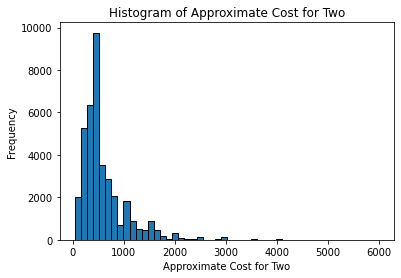

In [61]:

cost = updated_df['approx_cost_for_two']

# create a histogram
plt.hist(cost, bins=50, edgecolor='black')

# add labels
plt.xlabel('Approximate Cost for Two')
plt.ylabel('Frequency')
plt.title('Histogram of Approximate Cost for Two')

# show the plot
plt.show()

In [80]:
updated_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost_for_two,reviews_list,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,A beautiful place to dine inThe interiors ...,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Had been here for dinner with family Turne...,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Ambience is not that good enough and its n...,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Great food and proper Karnataka style full...,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Very good restaurant in neighbourhood Buff...,Buffet
